## Clone CSVs

In [1]:
!wget https://raw.githubusercontent.com/MasrourTawfik/Textra_Insights/main/Files/PCG.csv
!wget https://raw.githubusercontent.com/MasrourTawfik/Textra_Insights/main/Files/PCG_Refined.csv
!wget https://raw.githubusercontent.com/MasrourTawfik/Textra_Insights/main/Files/Queries.csv

--2024-12-15 18:37:08--  https://raw.githubusercontent.com/MasrourTawfik/Textra_Insights/main/Files/PCG.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54122 (53K) [text/plain]
Saving to: ‘PCG.csv’

PCG.csv             100%[===================>]  52.85K  --.-KB/s    in 0.009s  

2024-12-15 18:37:09 (5.81 MB/s) - ‘PCG.csv’ saved [54122/54122]

--2024-12-15 18:37:09--  https://raw.githubusercontent.com/MasrourTawfik/Textra_Insights/main/Files/PCG_Refined.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120894 (118K) [text/pla

## Dependencies

In [2]:
!pip install langchain-chroma==0.1.4
!pip install langchain_core==0.3.24
!pip install langchain_huggingface==0.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.6/166.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 6.4 MB/s eta 0:00

## Embedding model :

- You can choose  any embedding model from **Huggingface** or **Ollama** , in our case we prefer using **Huggingface** because of the huge amount of availible models.
- Discover Embedding Modles <a href = "https://huggingface.co/models?pipeline_tag=sentence-similarity&sort=likes">here</a> or see <a href = "https://huggingface.co/spaces/mteb/leaderboard">Embedding models LeaderBoard</a>

In [3]:
from langchain_huggingface import HuggingFaceEmbeddings

Embedding_name = "sentence-transformers/all-MiniLM-L6-v2"
model_kwargs = {'device': 'cuda','trust_remote_code': True }
encode_kwargs = {'normalize_embeddings': False}
                #'precision': "float32",}
embed_model = HuggingFaceEmbeddings(model_name=Embedding_name,model_kwargs=model_kwargs,encode_kwargs=encode_kwargs)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## CHROMA_Raw

### Build

In [4]:
from langchain_chroma import Chroma
from uuid import uuid4
from langchain_core.documents import Document

In [5]:
def CreateDocuments(df):
  documents = []
  for index, row in df.iterrows():
    document = Document(page_content = row["Definition"],
                        metadata={"AccountID": row["Id"],"AccountTitle":row["Title"]})
    documents.append(document)
  return documents

In [6]:
import pandas as pd

Accounts_Raw = pd.read_csv("PCG.csv")
Accounts_Raw.head()

,Id,Title,Definition
0,2111,Frais de constitution,Les frais de constitution correspondent aux fr...
1,2112,Frais préalables au démarrage,Les frais préalables au démarrage corresponden...
2,2113,Frais d'augmentation du capital,Il s'agit des frais engagés lors des opération...
3,2114,"Frais sur opérations de fusions, scissions et ...",Il s'agit des frais engagés à l'occasion des o...
4,2116,Frais de prospection,ll s'agit des frais de recherche de nouveaux c...


In [7]:
collection = "PCG_Accounts_Raw"
folder = "./CHROMA_Raw"

In [8]:
# Initialize

vector_store = Chroma(
    collection_name=collection,
    embedding_function=embed_model,
    persist_directory=folder,
    collection_metadata={"hnsw:space": "cosine"},# To insure that Similarities will be Normilized between 0 and 1
)

# Add Documents
Documents = CreateDocuments(Accounts_Raw)
uuids = [str(uuid4()) for _ in range(len(Documents))]
vector_store.add_documents(documents=Documents, ids=uuids)

['ad8f4e8f-d796-4bd3-9f3f-efd55c30e8b5',
 '4fcf9ef4-644b-4448-bfc1-ab1611f0efaf',
 'c332d277-6e39-4799-80f5-66f53a3e2984',
 'e54cdbcd-33c2-48fd-8d43-6119a33e3553',
 'bb25777d-3dfe-4de9-9779-312c65e4f379',
 '91f96cef-df15-4768-85e0-5ec845304ea0',
 '30bd6321-2cf8-4fc6-ad5e-29ae1c0b1b17',
 '2a13c068-d4ee-4e64-a293-d9be3b267c95',
 '83e61cf9-9793-450e-8d9e-3ce9b50e3753',
 '5451e092-0aa1-47e5-a242-969d634981b1',
 '18aadd8c-87da-418c-83a9-6294d47fcd50',
 '6247644e-a4ed-467f-9447-411edbf4d8d6',
 '215a5353-3ca4-429c-8365-8526920c3f70',
 '094ac8ec-83f4-48f4-a37e-1e728eddb40d',
 'd2e0979b-98d6-418c-ab23-1ceff958589a',
 'c903b77a-957f-42d7-91d2-3394f925a29d',
 'd8dcdf0e-8239-48a4-bd20-2f48c7a05021',
 '77b8661f-892a-4d10-9c2e-7fe12342a13c',
 '79d94ac5-ef44-450f-967a-ee8f99b784dd',
 'f9cac905-bbce-429e-b347-7f81788a2364',
 'f7e523a9-cadf-471b-845e-2fda134976c7',
 'f231b80c-dc5a-4d68-a579-6cd7681c1781',
 '40a3672e-0316-4c17-bce8-5aa24a6a866b',
 '63284d68-c092-43e0-9b8e-4755fd4fbdc8',
 'b7f077f0-2272-

### Evaluate

In [9]:
db_Raw = Chroma(persist_directory="CHROMA_Raw",
                embedding_function=embed_model,
                collection_name="PCG_Accounts_Raw",
                collection_metadata={"hnsw:space": "cosine"})

def Retrieve_Raw(Query):
  Outputs = {}
  results = db_Raw.similarity_search_with_relevance_scores(Query, k=5)
  for res, score in results:
    #print(res.metadata)
    Id = res.metadata["AccountID"]
    Outputs[Id] = score
  return Outputs

In [10]:
import pandas as pd
Queries = pd.read_csv("Queries.csv")
Queries.head()

,InvoiceName,Query,AccountID
0,3.jpg,L'achat concerne des fournitures pour l'exerci...,6126
1,49.jpg,L'achat concerne les fournitures d'eau et d'as...,6125
2,57.jpg,L'abonnement annuel au nom de domaine smartcal...,6126
3,58.jpg,L'entreprise a acheté des papiers de nettoyage...,6122
4,61.jpg,L'achat concerne des articles d\u00b7aménageme...,2351


- Test with a Query

In [11]:
query = Queries.loc[1]["Query"]
correctID = Queries.loc[1]["AccountID"]

print("Query : ", query)
print("Correct ID : ", correctID)

Query :  L'achat concerne les fournitures d'eau et d'assainissement pour l'entreprise. Il s'agit donc d'une dépense courante.
335 - Fournitures d'eau et assainissement
Fournitures de services publics
Eau et assainissement
Correct ID :  6125


In [12]:
Retrieve_Raw(query)

{6129: 0.5767637303667033,
 6128: 0.5538628686679673,
 6126: 0.4744187871881167,
 6124: 0.4652706689225403,
 6125: 0.45872214213954854}

- Test on all Queries

In [13]:
from tqdm import tqdm


def Calculate_value_Raw(Outputs,k):
    if k not in Outputs.keys():
        return 0
    sim_score_k = Outputs[k]
    return sim_score_k


def Evaluate_Raw(Queries):
    Scores = []
    for index, row in tqdm(Queries.iterrows(), total=Queries.shape[0], desc="Raw_Evaluating..."):
        query = row["Query"]
        correctID = row["AccountID"]
        results = Retrieve_Raw(query)
        score = Calculate_value_Raw(results, correctID)
        Scores.append(score)

    Queries["Similarity"] = Scores
    Queries.to_csv("Raw_Evaluation.csv",index = False)


In [14]:
Evaluate_Raw(Queries)

Raw_Evaluating...: 100%|██████████| 34/34 [00:00<00:00, 83.97it/s]


- Where there are a 0 means that the retiever didn't return the Correct account ID
- Where there are a value(!=0) it corresponding to the Similarity with Correct Definition.

In [15]:
Raw_Evaluation = pd.read_csv("Raw_Evaluation.csv")
Raw_Evaluation.head()

,InvoiceName,Query,AccountID,Similarity
0,3.jpg,L'achat concerne des fournitures pour l'exerci...,6126,0.000000
1,49.jpg,L'achat concerne les fournitures d'eau et d'as...,6125,0.458722
2,57.jpg,L'abonnement annuel au nom de domaine smartcal...,6126,0.000000
3,58.jpg,L'entreprise a acheté des papiers de nettoyage...,6122,0.000000
4,61.jpg,L'achat concerne des articles d\u00b7aménageme...,2351,0.452525


In [16]:
Average = Raw_Evaluation["Similarity"].mean()
zero_count = (Raw_Evaluation['Similarity'] == 0).sum()

print("Average Quality is :",Average)
print("Number of cases with 0 :",zero_count)

Average Quality is : 0.2913398420778938
Number of cases with 0 : 16


## CHROMA_Refined

### Build

In [17]:
from langchain_chroma import Chroma
from uuid import uuid4
from langchain_core.documents import Document

In [18]:
def CreateDocuments(df):
  documents = []
  for index, row in df.iterrows():
    document = Document(page_content = row["Definition"],
                        metadata={"AccountID": row["Id"],"AccountTitle":row["Title"]})
    documents.append(document)
  return documents

In [19]:
import pandas as pd

Accounts_Refined = pd.read_csv("PCG_Refined.csv")
Accounts_Refined.head()

,Id,Title,Definition
0,2111,Frais de constitution,Les frais de constitution sont les dépenses en...
1,2112,Frais préalables au démarrage,Les frais préalables au démarrage sont les dép...
2,2113,Frais d'augmentation du capital,Les frais d'augmentation du capital sont les c...
3,2114,"Frais sur opérations de fusions, scissions et ...","Les frais sur opérations de fusions, scissions..."
4,2116,Frais de prospection,Les frais de prospection sont les coûts engagé...


In [20]:
collection = "PCG_Accounts_Refined"
folder = "./CHROMA_Refined"

In [21]:
# Initialize

vector_store = Chroma(
    collection_name=collection,
    embedding_function=embed_model,
    persist_directory=folder,
    collection_metadata={"hnsw:space": "cosine"},# To insure that Similarities will be Normilized between 0 and 1
)

# Add Documents
Documents = CreateDocuments(Accounts_Refined)
uuids = [str(uuid4()) for _ in range(len(Documents))]
vector_store.add_documents(documents=Documents, ids=uuids)

['546708f0-c7d7-429a-b226-d96331970ac5',
 '34058c7b-d03d-4686-bad2-4a9c55a06dbf',
 '7fff664b-df34-46e0-9844-ebcf0a56157e',
 'ae2c6da8-37a2-41fe-af7e-92bfdb346031',
 '0c015c35-ae1f-4fde-8a50-9e9e1e89f002',
 '457698df-2133-4052-ba77-3ef5c7bc9d73',
 '6c14e712-7bb7-4957-aaf2-4aff001b2122',
 '80b49b41-4ac7-4b42-89fa-b653d822aa9f',
 'c262fe69-477f-4bd8-8547-b55a98ba8cb8',
 '51688627-f35e-499b-ab4a-8dab958134d0',
 '45ea6e34-868c-4425-9026-6d39930ee187',
 '348f3be6-0fbb-4c7a-878e-64fe5a0ce21b',
 'eea5f45f-8e68-4226-b414-c57fbcdb8d91',
 'fe8056f4-6967-43fb-a099-4791db981374',
 '4c2085d0-f4cc-4454-a1ed-0fc2b40fd7df',
 '7923f686-e375-4a36-abe3-ea52e94877f3',
 '4528b535-7f50-4726-bd2b-325fea4bff55',
 'a81e8495-d7ae-4707-95d5-df51418e0241',
 'b582eea2-141e-4eaf-b428-63cb301f6524',
 '8f9b16c8-1674-4e2b-9550-4778ec922004',
 'e4cd3a66-0a65-47b1-b57d-06515fbde401',
 'c1f0f18a-ca88-4574-911c-bb0f1f23a025',
 '3a41f650-7cbb-4a89-bad9-500e6870d252',
 '74aec478-7d75-40a1-958f-baca6aa3b17b',
 '716d34a6-6d36-

### Evaluate

In [22]:
db_Refined = Chroma(persist_directory="CHROMA_Refined",
                embedding_function=embed_model,
                collection_name="PCG_Accounts_Refined",
                collection_metadata={"hnsw:space": "cosine"})

def Retrieve_Refined(Query):
  Outputs = {}
  results = db_Refined.similarity_search_with_relevance_scores(Query, k=5)
  for res, score in results:
    #print(res.metadata)
    Id = res.metadata["AccountID"]
    Outputs[Id] = score
  return Outputs

In [23]:
import pandas as pd
Queries = pd.read_csv("Queries.csv")
Queries.head()

,InvoiceName,Query,AccountID
0,3.jpg,L'achat concerne des fournitures pour l'exerci...,6126
1,49.jpg,L'achat concerne les fournitures d'eau et d'as...,6125
2,57.jpg,L'abonnement annuel au nom de domaine smartcal...,6126
3,58.jpg,L'entreprise a acheté des papiers de nettoyage...,6122
4,61.jpg,L'achat concerne des articles d\u00b7aménageme...,2351


- Test with a Query

In [24]:
query = Queries.loc[1]["Query"]
correctID = Queries.loc[1]["AccountID"]

print("Query : ", query)
print("Correct ID : ", correctID)

Query :  L'achat concerne les fournitures d'eau et d'assainissement pour l'entreprise. Il s'agit donc d'une dépense courante.
335 - Fournitures d'eau et assainissement
Fournitures de services publics
Eau et assainissement
Correct ID :  6125


In [25]:
Retrieve_Refined(query)

{6125: 0.5858914933594013,
 6128: 0.548274734266464,
 2352: 0.5318487531244871,
 2118: 0.516326093758016,
 6144: 0.5079424026588482}

- Test on all Queries

In [26]:
from tqdm import tqdm


def Calculate_value_Refined(Outputs,k):
    if k not in Outputs.keys():
        return 0
    sim_score_k = Outputs[k]
    return sim_score_k


def Evaluate_Refined(Queries):
    Scores = []
    for index, row in tqdm(Queries.iterrows(), total=Queries.shape[0], desc="Refined_Evaluating..."):
        query = row["Query"]
        correctID = row["AccountID"]
        results = Retrieve_Refined(query)
        score = Calculate_value_Refined(results, correctID)
        Scores.append(score)

    Queries["Similarity"] = Scores
    Queries.to_csv("Refined_Evaluation.csv",index = False)


In [27]:
Evaluate_Refined(Queries)

Refined_Evaluating...: 100%|██████████| 34/34 [00:00<00:00, 86.62it/s]


- Where there are a 0 means that the retiever didn't return the Correct account ID
- Where there are a value(!=0) it corresponding to the Similarity with Correct Definition.

In [28]:
Refined_Evaluation = pd.read_csv("Refined_Evaluation.csv")
Refined_Evaluation.head()

,InvoiceName,Query,AccountID,Similarity
0,3.jpg,L'achat concerne des fournitures pour l'exerci...,6126,0.000000
1,49.jpg,L'achat concerne les fournitures d'eau et d'as...,6125,0.585891
2,57.jpg,L'abonnement annuel au nom de domaine smartcal...,6126,0.512265
3,58.jpg,L'entreprise a acheté des papiers de nettoyage...,6122,0.563667
4,61.jpg,L'achat concerne des articles d\u00b7aménageme...,2351,0.509466


In [29]:
Average = Refined_Evaluation["Similarity"].mean()
zero_count = (Refined_Evaluation['Similarity'] == 0).sum()

print("Average Quality is :",Average)
print("Number of cases with 0 :",zero_count)

Average Quality is : 0.3360957664079277
Number of cases with 0 : 13


## Plot Results

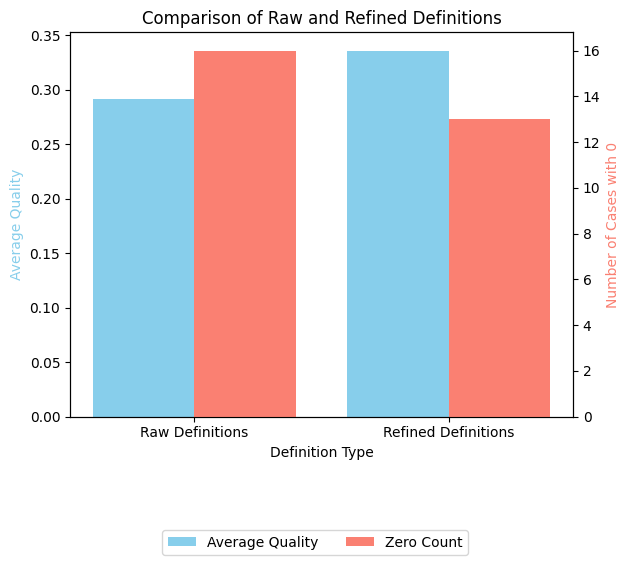

In [31]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Raw Definitions', 'Refined Definitions']
average_quality = [0.2913398420778938, 0.3360957664079277]
zero_count = [16, 13]

x = np.arange(len(categories))

fig, ax1 = plt.subplots()

bar1 = ax1.bar(x - 0.2, average_quality, 0.4, label='Average Quality', color='skyblue')

ax2 = ax1.twinx()
bar2 = ax2.bar(x + 0.2, zero_count, 0.4, label='Zero Count', color='salmon')

ax1.set_xlabel('Definition Type')
ax1.set_ylabel('Average Quality', color='skyblue')
ax2.set_ylabel('Number of Cases with 0', color='salmon')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.set_title('Comparison of Raw and Refined Definitions')

fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.tight_layout()
plt.show()
